In [1]:
#código para o desafio do bootcamp de TPD

1) Primeiro passo - Seção Spark

In [3]:
from pyspark.sql import SparkSession #importa a biblioteca que cria a seção do spark

In [4]:
#inicia a seção para a utilização do spark
spark = SparkSession.builder.appName("desafio_tpd").getOrCreate() #cria a seção caso não exista ou obtém a já criada

In [5]:
%fs ls /FileStore/tables    

path,name,size
dbfs:/FileStore/tables/Mall_Customers.csv,Mall_Customers.csv,4286
dbfs:/FileStore/tables/d1995_07_01_24d0c.json,d1995_07_01_24d0c.json,7451741
dbfs:/FileStore/tables/d1995_07_02_c3f44.json,d1995_07_02_c3f44.json,9572086
dbfs:/FileStore/tables/d1995_07_03_f99af.json,d1995_07_03_f99af.json,14125303
dbfs:/FileStore/tables/d1995_07_04_c5a7f.json,d1995_07_04_c5a7f.json,12030333
dbfs:/FileStore/tables/d1995_07_05_0f261.json,d1995_07_05_0f261.json,14662194
dbfs:/FileStore/tables/d1995_07_06_20619.json,d1995_07_06_20619.json,15557682
dbfs:/FileStore/tables/d1995_07_07_2dd8d.json,d1995_07_07_2dd8d.json,15279295
dbfs:/FileStore/tables/d1995_07_08_83302.json,d1995_07_08_83302.json,7033852
dbfs:/FileStore/tables/d1995_07_09_f75d3.json,d1995_07_09_f75d3.json,5589076


In [6]:
diretorioDatasetDiabets="/FileStore/tables/Mall_Customers.csv"  #diretório que contém o arquivo a ser utilizado

In [7]:
data = spark.read.format("csv").options(header="true", inferschema="true").load(diretorioDatasetDiabets)  #realiza a leitura do dataset

In [8]:
data.show(5,False)  #mostrando as 5 primeiras instâncias do dataset

+----------+------+---+------------------+----------------------+
CustomerID|Genre |Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
1 |Male |19 |15 |39 |
2 |Male |21 |15 |81 |
3 |Female|20 |16 |6 |
4 |Female|23 |16 |77 |
5 |Female|31 |17 |40 |
+----------+------+---+------------------+----------------------+
only showing top 5 rows

In [9]:
data.columns #mostra as colunas do dataset

Out[7]: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [10]:
data.printSchema()  #mostra o esquema inferido pelas variáveis

root
-- CustomerID: integer (nullable = true)
-- Genre: string (nullable = true)
-- Age: integer (nullable = true)
-- Annual Income (k$): integer (nullable = true)
-- Spending Score (1-100): integer (nullable = true)

In [11]:
data.count()  #conta a quantidade de registros

Out[9]: 200

In [12]:
#verificando a existência ou não de valores nulos
from pyspark.sql.functions import isnan, when, count, col

data.select([count(when(isnan(c), c)).alias(c) for c in data.columns]).show()

+----------+-----+---+------------------+----------------------+
CustomerID|Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+-----+---+------------------+----------------------+
 0| 0| 0| 0| 0|
+----------+-----+---+------------------+----------------------+

In [13]:
data.describe().show() #mostrando as estatísticas do dataset

+-------+------------------+------+-----------------+------------------+----------------------+
summary| CustomerID| Genre| Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
 count| 200| 200| 200| 200| 200|
 mean| 100.5| null| 38.85| 60.56| 50.2|
 stddev|57.879184513951124| null|13.96900733155888| 26.26472116527124| 25.823521668370173|
 min| 1|Female| 18| 15| 1|
 max| 200| Male| 70| 137| 99|
+-------+------------------+------+-----------------+------------------+----------------------+

Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.

In [15]:
#selecionando apenas algumas colunas
data_outliers=data.select([c for c in data.columns if c in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data_outliers.show()

+---+------------------+----------------------+
Age|Annual Income (k$)|Spending Score (1-100)|
+---+------------------+----------------------+
 19| 15| 39|
 21| 15| 81|
 20| 16| 6|
 23| 16| 77|
 31| 17| 40|
 22| 17| 76|
 35| 18| 6|
 23| 18| 94|
 64| 19| 3|
 30| 19| 72|
 67| 19| 14|
 35| 19| 99|
 58| 20| 15|
 24| 20| 77|
 37| 20| 13|
 22| 20| 79|
 35| 21| 35|
 20| 21| 66|
 52| 23| 29|
 35| 23| 98|
+---+------------------+----------------------+
only showing top 20 rows

In [16]:
#boxplot
display(data_outliers)

Age,Annual Income (k$),Spending Score (1-100)
19,15,39
21,15,81
20,16,6
23,16,77
31,17,40
22,17,76
35,18,6
23,18,94
64,19,3
30,19,72


In [17]:
#histograma
display(data_outliers)

Age,Annual Income (k$),Spending Score (1-100)
19,15,39
21,15,81
20,16,6
23,16,77
31,17,40
22,17,76
35,18,6
23,18,94
64,19,3
30,19,72


Conhecendo o dataset

In [19]:
display(data.select(["Genre", "Annual Income (k$)"]))

Genre,Annual Income (k$)
Male,15
Male,15
Female,16
Female,16
Female,17
Female,17
Female,18
Female,18
Male,19
Female,19


In [20]:
#distribuição dos consumidores pela idade
display(data.select(["Age"]))

Age
19
21
20
23
31
22
35
23
64
30


In [21]:
#encontrando a distribuição da idade x sexo
display(data.select(["Age", "Genre"]))

Age,Genre
19,Male
21,Male
20,Female
23,Female
31,Female
22,Female
35,Female
23,Female
64,Male
30,Female


In [22]:
#encontrando a distribuição da idade x sexo
display(data.select(["Age", "Genre"]))

Age,Genre
19,Male
21,Male
20,Female
23,Female
31,Female
22,Female
35,Female
23,Female
64,Male
30,Female


A variável "Spending Score (1-100)" ou pontuação de consumo, corresponde à nota atribuída pelo shopping aos consumidores. Quanto mais próxima de 100 indica que o consumidor é mais "lucrativo" para o shopping.

In [24]:
#encontrando as notas atribuidas por gênero 
display(data.select(["Spending Score (1-100)", "Genre"]))

Spending Score (1-100),Genre
39,Male
81,Male
6,Female
77,Female
40,Female
76,Female
6,Female
94,Female
3,Male
72,Female


Analisando a correlação entre Idade e Nota Atribuída

In [26]:
#Analisando as correlações
from pyspark.mllib.stat import Statistics

In [27]:
display(data.select(["Age", "Spending Score (1-100)"]))

Age,Spending Score (1-100)
19,39
21,81
20,6
23,77
31,40
22,76
35,6
23,94
64,3
30,72


In [28]:
rdd_1=data.select("Spending Score (1-100)").rdd.flatMap(lambda x:x)  #utilizada para transformar das colunas do dataframe em colunas para serem empregadas na análise de correlaçoes
rdd_2=data.select("Age").rdd.flatMap(lambda x:x)

In [29]:
Statistics.corr(rdd_1, rdd_2, method="pearson")  #definindo a coeficiente de correlação de pearson 

Out[23]: -0.32722684603909014

In [30]:
data.stat.corr("Age", "Spending Score (1-100)", method="pearson")

Out[24]: -0.32722684603909025

In [31]:
display(data.select(["Annual Income (k$)", "Spending Score (1-100)"]))

Annual Income (k$),Spending Score (1-100)
15,39
15,81
16,6
16,77
17,40
17,76
18,6
18,94
19,3
19,72


In [32]:
data.stat.corr("Annual Income (k$)", "Spending Score (1-100)", method="pearson")

Out[26]: 0.009902848094037497

Analisando a correlação por gênero

In [34]:
display(data.select(["Genre", "Spending Score (1-100)"]))

Genre,Spending Score (1-100)
Male,39
Male,81
Female,6
Female,77
Female,40
Female,76
Female,6
Female,94
Male,3
Female,72


In [35]:
#Selecionando os homens
homens=data[data.Genre=='Male']
homens.show()

+----------+-----+---+------------------+----------------------+
CustomerID|Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+-----+---+------------------+----------------------+
 1| Male| 19| 15| 39|
 2| Male| 21| 15| 81|
 9| Male| 64| 19| 3|
 11| Male| 67| 19| 14|
 15| Male| 37| 20| 13|
 16| Male| 22| 20| 79|
 18| Male| 20| 21| 66|
 19| Male| 52| 23| 29|
 21| Male| 35| 24| 35|
 22| Male| 25| 24| 73|
 24| Male| 31| 25| 73|
 26| Male| 29| 28| 82|
 28| Male| 35| 28| 61|
 31| Male| 60| 30| 4|
 33| Male| 53| 33| 4|
 34| Male| 18| 33| 92|
 42| Male| 24| 38| 92|
 43| Male| 48| 39| 36|
 52| Male| 33| 42| 60|
 54| Male| 59| 43| 60|
+----------+-----+---+------------------+----------------------+
only showing top 20 rows

In [36]:
#selecionando mulheres
mulheres=data[data.Genre=='Female']
mulheres.show()

+----------+------+---+------------------+----------------------+
CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
 3|Female| 20| 16| 6|
 4|Female| 23| 16| 77|
 5|Female| 31| 17| 40|
 6|Female| 22| 17| 76|
 7|Female| 35| 18| 6|
 8|Female| 23| 18| 94|
 10|Female| 30| 19| 72|
 12|Female| 35| 19| 99|
 13|Female| 58| 20| 15|
 14|Female| 24| 20| 77|
 17|Female| 35| 21| 35|
 20|Female| 35| 23| 98|
 23|Female| 46| 25| 5|
 25|Female| 54| 28| 14|
 27|Female| 45| 28| 32|
 29|Female| 40| 29| 31|
 30|Female| 23| 29| 87|
 32|Female| 21| 30| 73|
 35|Female| 49| 33| 14|
 36|Female| 21| 33| 81|
+----------+------+---+------------------+----------------------+
only showing top 20 rows

In [37]:
display(homens.select(["Age", "Spending Score (1-100)"]))

Age,Spending Score (1-100)
19,39
21,81
64,3
67,14
37,13
22,79
20,66
52,29
35,35
25,73


In [38]:
#correlação entre Idade e o Salário Anual - Homens
homens.stat.corr("Age", "Spending Score (1-100)", method="pearson")

Out[31]: -0.27962764627493125

In [39]:
display(mulheres.select(["Age", "Spending Score (1-100)"]))

Age,Spending Score (1-100)
20,6
23,77
31,40
22,76
35,6
23,94
30,72
35,99
58,15
24,77


In [40]:
#correlação entre Idade e o Salário Anual - Homens
mulheres.stat.corr("Age", "Spending Score (1-100)", method="pearson")

Out[33]: -0.3754385837780473

Aplicando o Kmeans

In [42]:
from pyspark.ml.evaluation import ClusteringEvaluator  #biblioteca utilizada para a avaliação em cada um dos clusters
from pyspark.ml.clustering import KMeans #biblioteca utilizada para a criação do modelo de clusterização utilizando o K-means

In [43]:
from pyspark.ml.feature import VectorAssembler  #transformando os dados em vetores de características

vecAssembler = VectorAssembler(inputCols=["Spending Score (1-100)", "Annual Income (k$)"], outputCol="features") #utilizada para transformar os dados em um vetor (define o objeto)
new_df = vecAssembler.transform(data) #Aplico a transformação
new_df.show()

+----------+------+---+------------------+----------------------+-----------+
CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)| features|
+----------+------+---+------------------+----------------------+-----------+
 1| Male| 19| 15| 39|[39.0,15.0]|
 2| Male| 21| 15| 81|[81.0,15.0]|
 3|Female| 20| 16| 6| [6.0,16.0]|
 4|Female| 23| 16| 77|[77.0,16.0]|
 5|Female| 31| 17| 40|[40.0,17.0]|
 6|Female| 22| 17| 76|[76.0,17.0]|
 7|Female| 35| 18| 6| [6.0,18.0]|
 8|Female| 23| 18| 94|[94.0,18.0]|
 9| Male| 64| 19| 3| [3.0,19.0]|
 10|Female| 30| 19| 72|[72.0,19.0]|
 11| Male| 67| 19| 14|[14.0,19.0]|
 12|Female| 35| 19| 99|[99.0,19.0]|
 13|Female| 58| 20| 15|[15.0,20.0]|
 14|Female| 24| 20| 77|[77.0,20.0]|
 15| Male| 37| 20| 13|[13.0,20.0]|
 16| Male| 22| 20| 79|[79.0,20.0]|
 17|Female| 35| 21| 35|[35.0,21.0]|
 18| Male| 20| 21| 66|[66.0,21.0]|
 19| Male| 52| 23| 29|[29.0,23.0]|
 20|Female| 35| 23| 98|[98.0,23.0]|
+----------+------+---+------------------+----------------------+-----------+
only showing top 20 rows

In [44]:
#aplica o processo de clusterização
kmeans = KMeans(k=5, seed=1)  # declara o objeto - 5 clusters 
model_k5 = kmeans.fit(new_df.select('features')) #aplica o treinamento

In [45]:
#cria o dataset com a indicação sobre qual cluster cada conjunto de dados foi adicionado
df_k5 = model_k5.transform(new_df)
df_k5.show()

+----------+------+---+------------------+----------------------+-----------+----------+
CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)| features|prediction|
+----------+------+---+------------------+----------------------+-----------+----------+
 1| Male| 19| 15| 39|[39.0,15.0]| 4|
 2| Male| 21| 15| 81|[81.0,15.0]| 2|
 3|Female| 20| 16| 6| [6.0,16.0]| 4|
 4|Female| 23| 16| 77|[77.0,16.0]| 2|
 5|Female| 31| 17| 40|[40.0,17.0]| 4|
 6|Female| 22| 17| 76|[76.0,17.0]| 2|
 7|Female| 35| 18| 6| [6.0,18.0]| 4|
 8|Female| 23| 18| 94|[94.0,18.0]| 2|
 9| Male| 64| 19| 3| [3.0,19.0]| 4|
 10|Female| 30| 19| 72|[72.0,19.0]| 2|
 11| Male| 67| 19| 14|[14.0,19.0]| 4|
 12|Female| 35| 19| 99|[99.0,19.0]| 2|
 13|Female| 58| 20| 15|[15.0,20.0]| 4|
 14|Female| 24| 20| 77|[77.0,20.0]| 2|
 15| Male| 37| 20| 13|[13.0,20.0]| 4|
 16| Male| 22| 20| 79|[79.0,20.0]| 2|
 17|Female| 35| 21| 35|[35.0,21.0]| 4|
 18| Male| 20| 21| 66|[66.0,21.0]| 2|
 19| Male| 52| 23| 29|[29.0,23.0]| 4|
 20|Female| 35| 23| 98|[98.0,23.0]| 2|
+----------+------+---+------------------+----------------------+-----------+----------+
only showing top 20 rows

In [46]:
df_k5.groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 39|
 3| 81|
 4| 23|
 2| 22|
 0| 35|
+----------+-----+

In [47]:
#transformando os dados utilizando o pandas 
data_pandas_k5 = df_k5.toPandas().set_index('CustomerID')
data_pandas_k5.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),features,prediction
CustomerID,,,,,,
1,Male,19,15,39,"[39.0, 15.0]",4
2,Male,21,15,81,"[81.0, 15.0]",2
3,Female,20,16,6,"[6.0, 16.0]",4
4,Female,23,16,77,"[77.0, 16.0]",2
5,Female,31,17,40,"[40.0, 17.0]",4


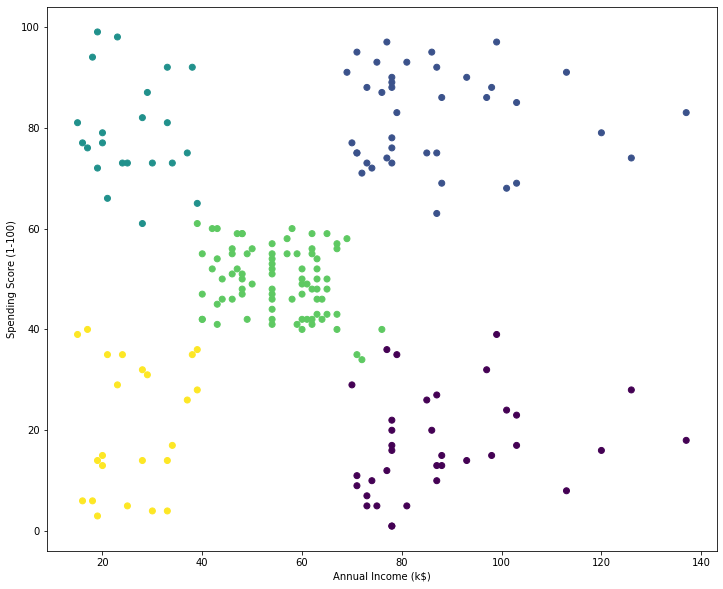

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(data_pandas_k5['Annual Income (k$)'], data_pandas_k5['Spending Score (1-100)'], c=data_pandas_k5.prediction)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [49]:
#aplica o processo de clusterização
kmeans = KMeans(k=3, seed=1)  # declara o objeto - 5 clusters 
model_k3 = kmeans.fit(new_df.select('features')) #aplica o treinamento

In [50]:
#cria o dataset com a indicação sobre qual cluster cada conjunto de dados foi adicionado
df_k3 = model_k3.transform(new_df)
df_k3.show()

+----------+------+---+------------------+----------------------+-----------+----------+
CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)| features|prediction|
+----------+------+---+------------------+----------------------+-----------+----------+
 1| Male| 19| 15| 39|[39.0,15.0]| 2|
 2| Male| 21| 15| 81|[81.0,15.0]| 2|
 3|Female| 20| 16| 6| [6.0,16.0]| 2|
 4|Female| 23| 16| 77|[77.0,16.0]| 2|
 5|Female| 31| 17| 40|[40.0,17.0]| 2|
 6|Female| 22| 17| 76|[76.0,17.0]| 2|
 7|Female| 35| 18| 6| [6.0,18.0]| 2|
 8|Female| 23| 18| 94|[94.0,18.0]| 2|
 9| Male| 64| 19| 3| [3.0,19.0]| 2|
 10|Female| 30| 19| 72|[72.0,19.0]| 2|
 11| Male| 67| 19| 14|[14.0,19.0]| 2|
 12|Female| 35| 19| 99|[99.0,19.0]| 2|
 13|Female| 58| 20| 15|[15.0,20.0]| 2|
 14|Female| 24| 20| 77|[77.0,20.0]| 2|
 15| Male| 37| 20| 13|[13.0,20.0]| 2|
 16| Male| 22| 20| 79|[79.0,20.0]| 2|
 17|Female| 35| 21| 35|[35.0,21.0]| 2|
 18| Male| 20| 21| 66|[66.0,21.0]| 2|
 19| Male| 52| 23| 29|[29.0,23.0]| 2|
 20|Female| 35| 23| 98|[98.0,23.0]| 2|
+----------+------+---+------------------+----------------------+-----------+----------+
only showing top 20 rows

In [51]:
df_k3.groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 39|
 2| 123|
 0| 38|
+----------+-----+

In [52]:
#transformando os dados utilizando o pandas 
data_pandas_k3 = df_k3.toPandas().set_index('CustomerID')
data_pandas_k3.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),features,prediction
CustomerID,,,,,,
1,Male,19,15,39,"[39.0, 15.0]",2
2,Male,21,15,81,"[81.0, 15.0]",2
3,Female,20,16,6,"[6.0, 16.0]",2
4,Female,23,16,77,"[77.0, 16.0]",2
5,Female,31,17,40,"[40.0, 17.0]",2


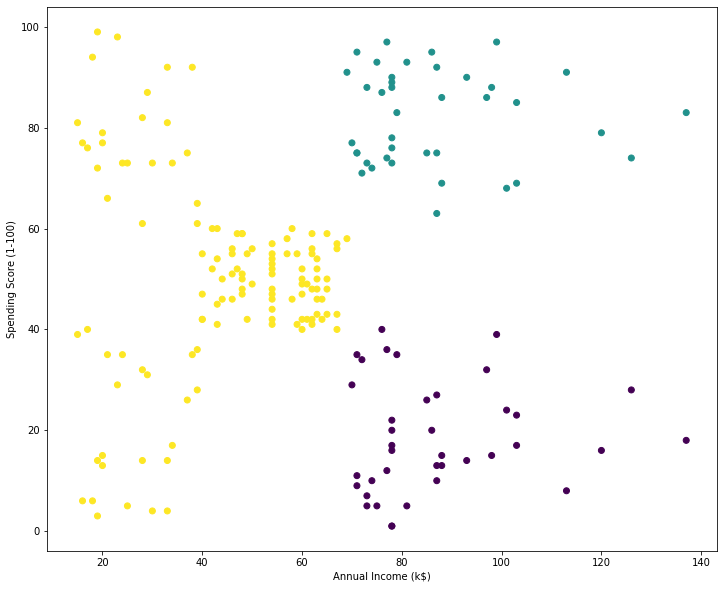

In [53]:
plt.figure(figsize=(12,10))
plt.scatter(data_pandas_k3['Annual Income (k$)'], data_pandas_k3['Spending Score (1-100)'], c=data_pandas_k3.prediction)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()